# Importing Packages

In [1]:
import os, shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cvlib as cv

In [2]:
os.listdir(r'Medical Mask/Medical Mask/Medical Mask/images')


['0001.jpg',
 '0002.png',
 '0003.jpg',
 '0004.jpg',
 '0005.jpg',
 '0006.jpg',
 '0007.jpg',
 '0009.jpg',
 '0010.jpg',
 '0011.jpg',
 '0012.jpg',
 '0014.jpg',
 '0015.jpg',
 '0017.jpg',
 '0018.jpg',
 '0019.jpg',
 '0020.jpg',
 '0021.jpg',
 '0022.jpg',
 '0023.jpg',
 '0024.jpg',
 '0025.jpg',
 '0026.jpg',
 '0027.jpg',
 '0028.jpg',
 '0029.jpg',
 '0030.jpg',
 '0031.jpg',
 '0032.jpg',
 '0033.jpg',
 '0034.jpg',
 '0035.jpg',
 '0036.jpg',
 '0037.jpg',
 '0038.jpg',
 '0039.jpg',
 '0040.jpg',
 '0041.jpg',
 '0042.jpg',
 '0043.jpg',
 '0044.jpg',
 '0045.jpg',
 '0046.jpg',
 '0048.jpg',
 '0049.jpg',
 '0050.jpg',
 '0051.jpg',
 '0052.jpeg',
 '0053.jpg',
 '0054.jpg',
 '0055.jpg',
 '0056.jpg',
 '0057.jpg',
 '0058.jpg',
 '0059.jpg',
 '0060.jpg',
 '0061.jpg',
 '0062.jpg',
 '0063.jpg',
 '0064.jpg',
 '0065.jpg',
 '0066.jpg',
 '0067.jpg',
 '0068.jpg',
 '0069.jpg',
 '0070.jpg',
 '0071.jpg',
 '0072.jpg',
 '0073.jpg',
 '0074.jpg',
 '0075.jpg',
 '0076.jpg',
 '0077.jpg',
 '0078.png',
 '0079.jpg',
 '0081.jpg',
 '0082.png'

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [5]:
train['classname'].value_counts()

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64

In [6]:
train['classname'].isna().sum()

0

In [7]:
train = train[(train['classname']=='face_with_mask') | (train['classname']=='face_no_mask')]

In [8]:
train['classname'].value_counts()

face_with_mask    4180
face_no_mask      1569
Name: classname, dtype: int64

In [9]:
train.sort_values(by = ['name'],inplace=True)

In [10]:
train.shape

(5749, 6)

In [11]:
train[train['name']=='6433.png']

,name,x1,x2,y1,y2,classname
13549,6433.png,669,105,798,281,face_with_mask
13550,6433.png,765,142,976,364,face_with_mask
13548,6433.png,536,152,665,333,face_with_mask
13547,6433.png,146,107,304,313,face_with_mask


In [12]:
train.head()

,name,x1,x2,y1,y2,classname
13381,1801.jpg,451,186,895,697,face_no_mask
3463,1802.jpg,110,71,273,272,face_with_mask
14835,1803.jpg,126,75,303,333,face_with_mask
5867,1804.jpg,112,113,262,307,face_with_mask
6194,1805.jpg,728,180,853,336,face_with_mask


# Face Detection

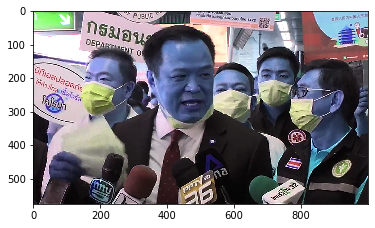

In [13]:

image_path = r'Medical Mask/Medical Mask/Medical Mask/images/6433.png'
im = cv2.imread(image_path)
plt.imshow(im)
plt.show()

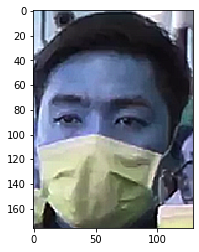

In [14]:
#Given in train

crop_img = im[105:281, 669:798]
plt.imshow(crop_img)
plt.show()

139 276 672 779


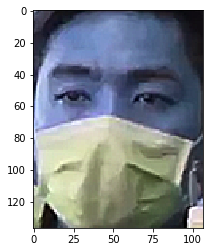

96 331 374 548


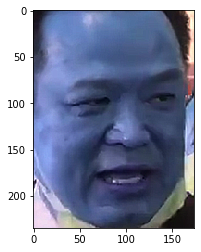

133 302 143 282


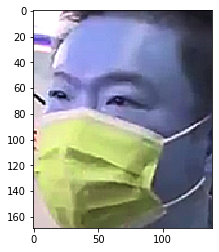

173 314 534 658


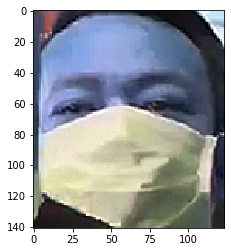

In [15]:
#Detecting face through cv2 image detector
faces, confidences = cv.detect_face(im)
# loop through detected faces and add bounding box
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    #img = cv2.imread("lenna.png")
    print(startY,endY,startX,endX)
    crop_img = im[startY:endY, startX:endX]
    plt.imshow(crop_img)
    plt.show()

# Data Preparation

In [16]:
os.getcwd()

'C:\\Users\\carla\\Mask_Detection'

In [17]:
original_dataset_dir = r"C:\Users\carla\Mask_Detection\Medical mask\Medical mask\Medical Mask\images"
base_dir = r"C:\Users\carla\Mask_Detection"

In [18]:
train.head()

,name,x1,x2,y1,y2,classname
13381,1801.jpg,451,186,895,697,face_no_mask
3463,1802.jpg,110,71,273,272,face_with_mask
14835,1803.jpg,126,75,303,333,face_with_mask
5867,1804.jpg,112,113,262,307,face_with_mask
6194,1805.jpg,728,180,853,336,face_with_mask


In [19]:
train = train.sample(frac=1,random_state=0).reset_index(drop=True)

In [20]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir,'val')
os.mkdir(val_dir)

train_dir_nomask = os.path.join(train_dir,'face_no_mask')
os.mkdir(train_dir_nomask)
train_dir_mask = os.path.join(train_dir,'face_with_mask')
os.mkdir(train_dir_mask)

val_dir_nomask = os.path.join(val_dir,'face_no_mask')
os.mkdir(val_dir_nomask)
val_dir_mask = os.path.join(val_dir,'face_with_mask')
os.mkdir(val_dir_mask)


In [21]:

for grp,df in train.groupby("classname"):
    
    train_rows = int(df.shape[0]*0.75)
    
    train_df = df.iloc[:train_rows]
    val_df = df.iloc[train_rows:]

    
    train_dir_grp = os.path.join(train_dir,grp)
    val_dir_grp = os.path.join(val_dir,grp)

    
    for index,row in train_df.iterrows():
        
        src = os.path.join(original_dataset_dir,row['name'])
        im = cv2.imread(src)
        x1,x2,y1,y2 = row['x1'],row['x2'],row['y1'],row['y2']
        crop_img = im[x2:y2, x1:y1] 
        
        dst = os.path.join(train_dir_grp,row['name'][:-4]+'_'+str(index)+'.jpg') 
        cv2.imwrite(dst, crop_img)
        
        
    for index,row in val_df.iterrows():
        
        src = os.path.join(original_dataset_dir,row['name'])
        im = cv2.imread(src)
        x1,x2,y1,y2 = row['x1'],row['x2'],row['y1'],row['y2']
        crop_img = im[x2:y2, x1:y1] 
        
        dst =  os.path.join(val_dir_grp,row['name'][:-4]+'_'+str(index)+'.jpg') 
        cv2.imwrite(dst, crop_img)
    
    print(grp)
    print(len(os.listdir(train_dir_grp)))
    print(len(os.listdir(val_dir_grp)))

face_no_mask
1176
393
face_with_mask
3135
1045


# Training the model

In [22]:
from keras import layers
from keras import models
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [23]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)        

In [24]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [25]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(50, 50),
batch_size=30,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
val_dir,
target_size=(50, 50),
batch_size=30,
shuffle=False,
class_mode='binary')

Found 4311 images belonging to 2 classes.
Found 1438 images belonging to 2 classes.


In [26]:
history = model.fit_generator(
train_generator,
steps_per_epoch=np.ceil(len(train_generator.filenames)/40),
epochs=20,
validation_data=validation_generator,
validation_steps=np.ceil(len(validation_generator.filenames)/40))

Epoch 1/20
108/108 [==============================] - 9s 84ms/step - loss: 0.4599 - acc: 0.7617 - val_loss: 0.2800 - val_acc: 0.8602
Epoch 2/20
108/108 [==============================] - 9s 82ms/step - loss: 0.3011 - acc: 0.8709 - val_loss: 0.1721 - val_acc: 0.8961
Epoch 3/20
108/108 [==============================] - 10s 90ms/step - loss: 0.2729 - acc: 0.8849 - val_loss: 0.4453 - val_acc: 0.8868
Epoch 4/20
108/108 [==============================] - 10s 93ms/step - loss: 0.2532 - acc: 0.8976 - val_loss: 0.1520 - val_acc: 0.9249
Epoch 5/20
108/108 [==============================] - 9s 84ms/step - loss: 0.2306 - acc: 0.9047 - val_loss: 0.2693 - val_acc: 0.9065
Epoch 6/20
108/108 [==============================] - 9s 81ms/step - loss: 0.2401 - acc: 0.9074 - val_loss: 0.1178 - val_acc: 0.9063
Epoch 7/20
108/108 [==============================] - 11s 99ms/step - loss: 0.2210 - acc: 0.9140 - val_loss: 0.5091 - val_acc: 0.9045
Epoch 8/20
108/108 [==============================] - 9s 81ms/step

In [27]:
model.save('model.h5')

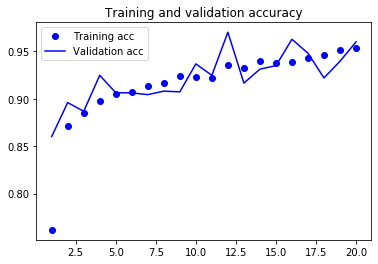

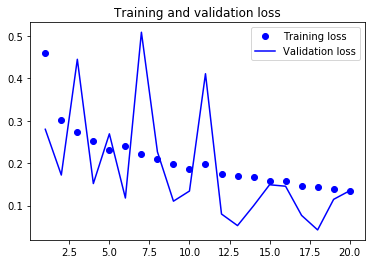

In [28]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Predicting for a new image

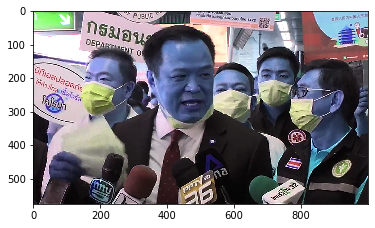

In [29]:

image_path = r'Medical Mask/Medical Mask/Medical Mask/images/6433.png'
im = cv2.imread(image_path)
plt.imshow(im)
plt.show()

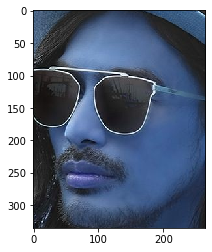

The probability of this face wearing a mask is 0.14504097402095795


In [52]:
faces, confidences = cv.detect_face(im)
# loop through detected faces and add bounding box
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    #img = cv2.imread("lenna.png")
    #print(startY,endY,startX,endX)
    crop_img = im[startY:endY, startX:endX]
    plt.imshow(crop_img)
    plt.show()
    
    #print(crop_img.shape)
        
    crop_img1= cv2.resize(crop_img,(50,50),interpolation = cv2.INTER_AREA)
    crop_img1 = cv2.cvtColor(crop_img1, cv2.COLOR_RGB2BGR)
    crop_img1 = crop_img1.reshape((1,50,50,3))
    crop_img1 = crop_img1/255.0
    print(f"The probability of this face wearing a mask is {model.predict(crop_img1)[0][0]}")

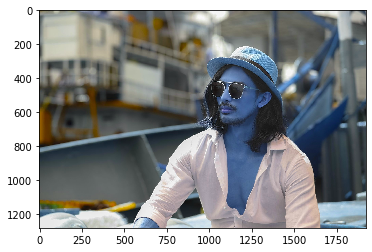

In [31]:
image_path = r'Medical Mask/Medical Mask/Medical Mask/images/0046.jpg'
im = cv2.imread(image_path)
plt.imshow(im)
plt.show()

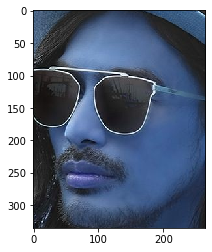

The probability of this face wearing a mask is 0.14504097402095795


In [32]:
faces, confidences = cv.detect_face(im)
# loop through detected faces and add bounding box
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    #img = cv2.imread("lenna.png")
    #print(startY,endY,startX,endX)
    crop_img = im[startY:endY, startX:endX]
    plt.imshow(crop_img)
    plt.show()
    
    #print(crop_img.shape)
    
    crop_img1= cv2.resize(crop_img,(50,50),interpolation = cv2.INTER_AREA)
    crop_img1 = cv2.cvtColor(crop_img1, cv2.COLOR_RGB2BGR)
    crop_img1 = crop_img1.reshape((1,50,50,3))
    crop_img1 = crop_img1/255.0
    print(f"The probability of this face wearing a mask is {model.predict(crop_img1)[0][0]}")

In [33]:
filenames = validation_generator.filenames
nb_samples = len(filenames)

In [34]:
filenames

['face_no_mask\\1801_5293.jpg',
 'face_no_mask\\1808_4989.jpg',
 'face_no_mask\\1813_4369.jpg',
 'face_no_mask\\1815_5195.jpg',
 'face_no_mask\\1821_5593.jpg',
 'face_no_mask\\1851_4478.jpg',
 'face_no_mask\\1852_5122.jpg',
 'face_no_mask\\1857_4773.jpg',
 'face_no_mask\\1885_4452.jpg',
 'face_no_mask\\1940_4415.jpg',
 'face_no_mask\\1940_4710.jpg',
 'face_no_mask\\1940_4880.jpg',
 'face_no_mask\\1952_5572.jpg',
 'face_no_mask\\1953_4366.jpg',
 'face_no_mask\\1953_5466.jpg',
 'face_no_mask\\1967_5072.jpg',
 'face_no_mask\\1975_4757.jpg',
 'face_no_mask\\1987_5659.jpg',
 'face_no_mask\\1990_5065.jpg',
 'face_no_mask\\1994_5380.jpg',
 'face_no_mask\\2014_5631.jpg',
 'face_no_mask\\2041_5170.jpg',
 'face_no_mask\\2048_4613.jpg',
 'face_no_mask\\2064_4854.jpg',
 'face_no_mask\\2092_5687.jpg',
 'face_no_mask\\2103_5171.jpg',
 'face_no_mask\\2122_5581.jpg',
 'face_no_mask\\2229_4694.jpg',
 'face_no_mask\\2246_5434.jpg',
 'face_no_mask\\2276_4855.jpg',
 'face_no_mask\\2277_4981.jpg',
 'face_n

In [35]:
import numpy as np
predict = model.predict_generator(validation_generator,steps = np.ceil(nb_samples/30))
predict.shape

(1438, 1)

In [36]:
predict[:390,:].mean()

0.15265438

In [37]:
predict[390:,:].mean()

0.9434381

In [53]:
p=list(predict)

In [54]:
p[-20:]

[array([0.99995935], dtype=float32),
 array([0.9995165], dtype=float32),
 array([0.96771383], dtype=float32),
 array([0.9993468], dtype=float32),
 array([0.9911833], dtype=float32),
 array([0.9712621], dtype=float32),
 array([0.9999999], dtype=float32),
 array([0.9831783], dtype=float32),
 array([0.99996734], dtype=float32),
 array([0.99980575], dtype=float32),
 array([0.30168384], dtype=float32),
 array([0.99913126], dtype=float32),
 array([0.9963814], dtype=float32),
 array([0.99942774], dtype=float32),
 array([0.99992025], dtype=float32),
 array([0.9999993], dtype=float32),
 array([0.9535538], dtype=float32),
 array([0.93285143], dtype=float32),
 array([0.9954873], dtype=float32),
 array([0.99999774], dtype=float32)]

In [55]:
p[0:20]

[array([0.0125772], dtype=float32),
 array([0.02725982], dtype=float32),
 array([0.0055486], dtype=float32),
 array([0.41700464], dtype=float32),
 array([0.09032538], dtype=float32),
 array([0.02786054], dtype=float32),
 array([0.25690556], dtype=float32),
 array([0.07779369], dtype=float32),
 array([0.0858698], dtype=float32),
 array([0.18215808], dtype=float32),
 array([0.21304154], dtype=float32),
 array([0.02629574], dtype=float32),
 array([0.04994669], dtype=float32),
 array([0.02906603], dtype=float32),
 array([0.02084493], dtype=float32),
 array([0.33473018], dtype=float32),
 array([0.30757838], dtype=float32),
 array([0.4773744], dtype=float32),
 array([0.02287194], dtype=float32),
 array([0.24384329], dtype=float32)]